In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

In [3]:
data = "/Users/jangsunho/Desktop/test/breast-cancer-wisconsin.data.txt"
df = pd.read_csv(data, header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names


In [6]:
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
df.drop('Id', axis=1, inplace  =True)

In [8]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

In [9]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [10]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [11]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

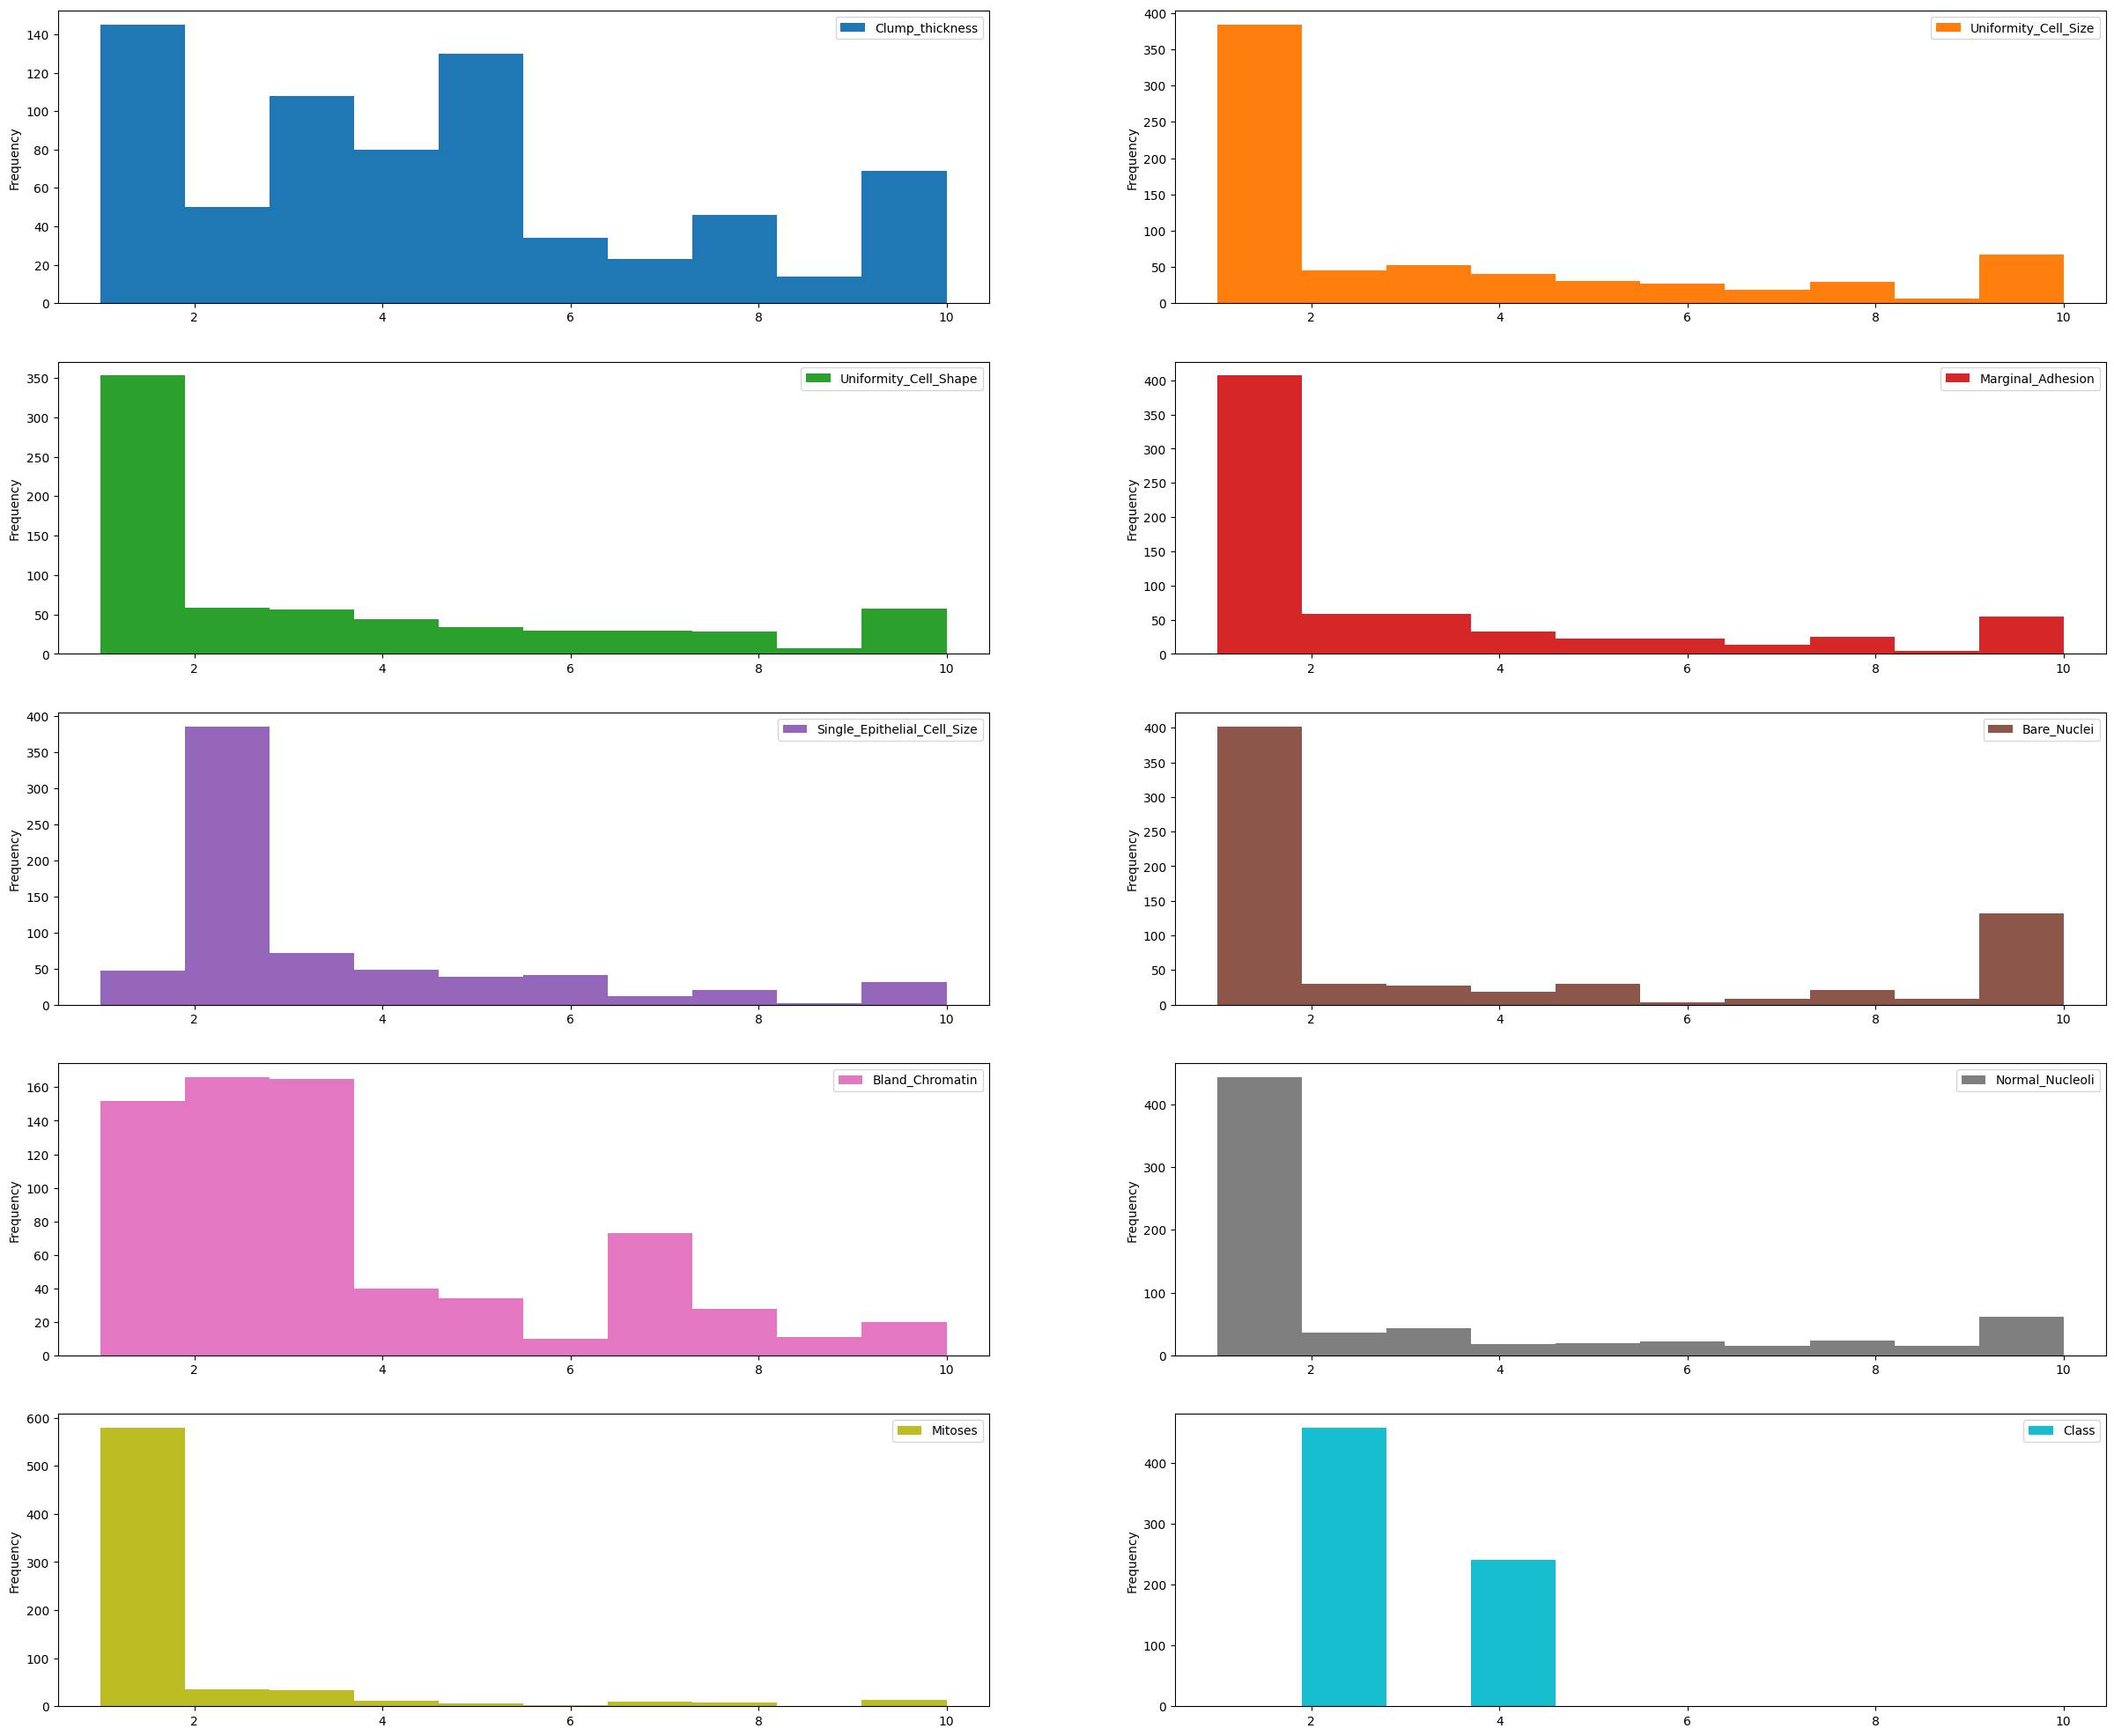

In [15]:
plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [17]:
correlation = df.corr()
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

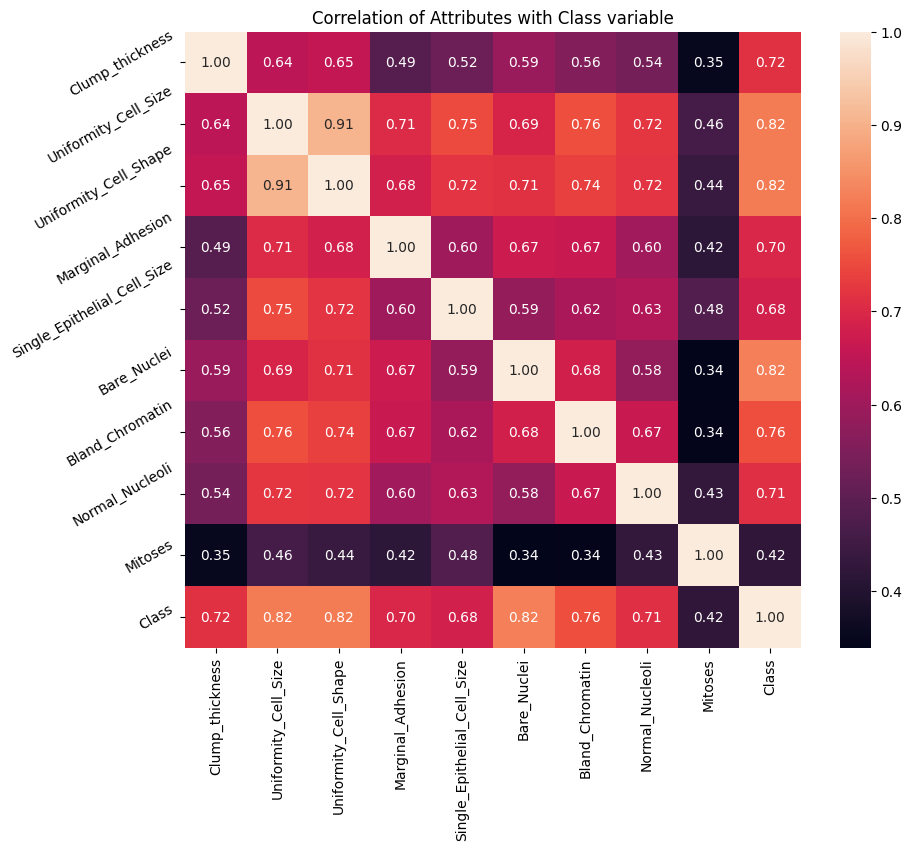

In [18]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [19]:
X = df.drop(['Class'], axis= 1)
y = df['Class']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, X_test.shape

((559, 9), (140, 9))

In [23]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/2881082306.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/2881082306.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [24]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [26]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [27]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [28]:
cols = X_train.columns

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [33]:
X_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.125209,-0.679581,-0.382092,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
1,-0.125209,-0.353219,-0.382092,-0.622471,-0.546543,-0.665096,-0.577774,-0.608165,-0.324258
2,0.592655,0.952231,0.961239,2.164005,1.280168,-0.665096,1.511331,1.664758,-0.324258
3,0.233723,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258
4,1.310519,1.278593,0.625406,2.512315,1.736846,1.577973,0.675689,0.690648,1.494406
...,...,...,...,...,...,...,...,...,...
135,-0.843073,-0.679581,-0.717925,-0.622471,-0.089865,-0.665096,-0.577774,-0.608165,-0.324258
136,-0.843073,-0.679581,-0.717925,-0.622471,-0.546543,-0.665096,-0.995595,-0.608165,-0.324258
137,0.951587,0.625868,0.961239,2.512315,0.366813,1.858357,0.675689,0.041241,-0.324258
138,-0.484141,-0.679581,-0.717925,-0.622471,-1.003220,-0.665096,-0.577774,-0.608165,-0.324258


In [31]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [40]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [42]:
from sklearn.metrics import accuracy_score


y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training-set accuracy score: 0.9821
Training set score: 0.9821
Test set score: 0.9714


In [43]:
null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


In [45]:
y_pred_1 = knn.predict_proba(X_test)[:, 1]
y_pred_1

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

Text(0, 0.5, 'Frequency')

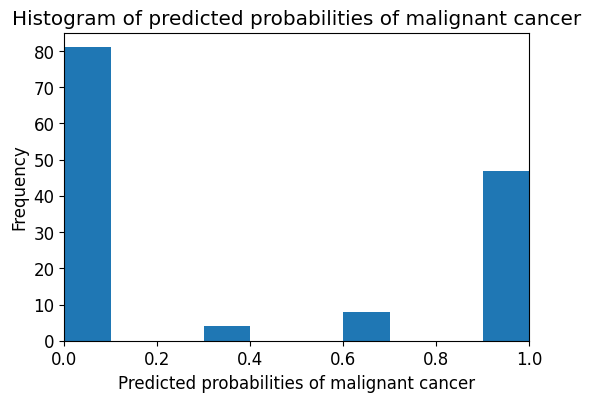

In [46]:
# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k = None
best_score = 0.0

for k in range(1, 11):  # n_neighbors from 1 to 10
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred_train = knn.predict(X_train)
    acc = accuracy_score(y_train, y_pred_train)
    
    print(f'n_neighbors={k}, Training-set accuracy: {acc:.4f}')
    
    if acc > best_score:
        best_score = acc
        best_k = k

print(f'\n✅ Best Training Accuracy: {best_score:.4f} at n_neighbors={best_k}')


n_neighbors=1, Training-set accuracy: 1.0000
n_neighbors=2, Training-set accuracy: 0.9732
n_neighbors=3, Training-set accuracy: 0.9821
n_neighbors=4, Training-set accuracy: 0.9714
n_neighbors=5, Training-set accuracy: 0.9696
n_neighbors=6, Training-set accuracy: 0.9696
n_neighbors=7, Training-set accuracy: 0.9678
n_neighbors=8, Training-set accuracy: 0.9696
n_neighbors=9, Training-set accuracy: 0.9678
n_neighbors=10, Training-set accuracy: 0.9678

✅ Best Training Accuracy: 1.0000 at n_neighbors=1


In [49]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train, y_train, cv = 10, scoring='accuracy')
cv_mean = scores.mean()

print('Cross-validation scores:{}'.format(scores))
print('Cross-validation mean_scores:{}'.format(cv_mean))

Cross-validation scores:[0.89285714 0.96428571 0.94642857 0.96428571 0.96428571 0.94642857
 0.98214286 0.94642857 0.98214286 0.98181818]
Cross-validation mean_scores:0.9571103896103896


In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

best_k = None
best_score = 0.0

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_train)
    cluster_labels = kmeans.labels_

    # 클러스터 라벨과 실제 y_train 라벨 매칭
    matched_labels = np.zeros_like(cluster_labels)

    for i in range(k):
        mask = (cluster_labels == i)
        if np.sum(mask) == 0:
            continue
        # 가장 많이 등장하는 실제 라벨로 매핑
        matched_labels[mask] = mode(y_train[mask], keepdims=True).mode[0]

    acc = accuracy_score(y_train, matched_labels)
    print(f'n_clusters={k}, Training accuracy: {acc:.4f}')

    if acc > best_score:
        best_score = acc
        best_k = k

print(f'\n✅ Best Accuracy: {best_score:.4f} at n_clusters={best_k}')


n_clusters=1, Training accuracy: 0.6673
n_clusters=2, Training accuracy: 0.9499
n_clusters=3, Training accuracy: 0.9642
n_clusters=4, Training accuracy: 0.9660
n_clusters=5, Training accuracy: 0.9696
n_clusters=6, Training accuracy: 0.9660
n_clusters=7, Training accuracy: 0.9606
n_clusters=8, Training accuracy: 0.9678
n_clusters=9, Training accuracy: 0.9678
n_clusters=10, Training accuracy: 0.9714

✅ Best Accuracy: 0.9714 at n_clusters=10


- Fold 간 편차가 크지않음 - > 안정적인 편이라는 것.
- 과적합이랑 훈련 데이터에는 잘 맞지만, 새로운 데이터에서는 성능이 떨어지는 현상
원인은 너무 복잡한 모델, 작은 데이터셋, 불필요한 피처


In [56]:
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import numpy as np

# 설정
n_clusters = 5
cv = 5
kf = KFold(n_splits=cv, shuffle=True, random_state=42)

cv_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # KMeans 모델 훈련
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X_tr)
    
    # 검증 데이터 클러스터링
    cluster_labels = kmeans.predict(X_val)

    # 클러스터 라벨 → 실제 라벨로 매핑
    matched_labels = np.zeros_like(cluster_labels)
    for i in range(n_clusters):
        mask = (cluster_labels == i)
        if np.sum(mask) == 0:
            continue
        matched_labels[mask] = mode(y_val[mask], keepdims=True).mode[0]

    # 정확도 계산
    acc = accuracy_score(y_val, matched_labels)
    cv_scores.append(acc)
    print(f'Fold {fold+1} accuracy: {acc:.4f}')

# 평균 정확도 출력
cv_mean = np.mean(cv_scores)
print('\nCross-validation scores:', cv_scores)
print('✅ Cross-validation mean accuracy: {:.4f}'.format(cv_mean))


Fold 1 accuracy: 0.9554
Fold 2 accuracy: 0.9643
Fold 3 accuracy: 0.9643
Fold 4 accuracy: 0.9911
Fold 5 accuracy: 0.9550

Cross-validation scores: [0.9553571428571429, 0.9642857142857143, 0.9642857142857143, 0.9910714285714286, 0.954954954954955]
✅ Cross-validation mean accuracy: 0.9660


In [ ]:
for col in X_train.columns:
    print(col)


('Clump_thickness',)
('Uniformity_Cell_Size',)
('Uniformity_Cell_Shape',)
('Marginal_Adhesion',)
('Single_Epithelial_Cell_Size',)
('Bare_Nuclei',)
('Bland_Chromatin',)
('Normal_Nucleoli',)
('Mitoses',)


In [53]:
pd.set_option('display.max_columns', None)

In [54]:
# 예시: 5개의 클러스터로 군집화
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans.fit(X_train)

# 클러스터별 중심점 (각 cluster의 중심 좌표)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_train.columns)
print("클러스터 중심 좌표 (features):")
print(centroids)

클러스터 중심 좌표 (features):
  Clump_thickness Uniformity_Cell_Size Uniformity_Cell_Shape  \
0       -0.520626            -0.611439             -0.609056   
1        1.210489             1.797563              1.709980   
2        1.235742             1.822531              1.814813   
3        0.881944             0.387186              0.530170   
4        0.626044             1.005360              0.890948   

  Marginal_Adhesion Single_Epithelial_Cell_Size Bare_Nuclei Bland_Chromatin  \
0         -0.525825                   -0.536506   -0.590378       -0.558260   
1          0.907807                    1.295141    0.791980        1.566127   
2          1.743131                    2.079354    1.157397        1.372057   
3          0.032559                    0.496318    1.029760        0.507313   
4          2.139705                    0.770388    1.623617        0.947758   

  Normal_Nucleoli   Mitoses  
0       -0.546614 -0.302607  
1        1.558298 -0.016178  
2        1.570053  4.096107

/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/304856195.py:16: UserWarning:

Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.

/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/304856195.py:16: UserWarning:

Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.

/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/304856195.py:16: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/304856195.py:16: UserWarning:

Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.

/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/304856195.py:16: UserWarning:

Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.

/var/folders/46/1sp9y6bn2bd214vk81sxx8z00000gn/T/ipykernel_1856/304856195.py:16: UserWarning:

Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu San

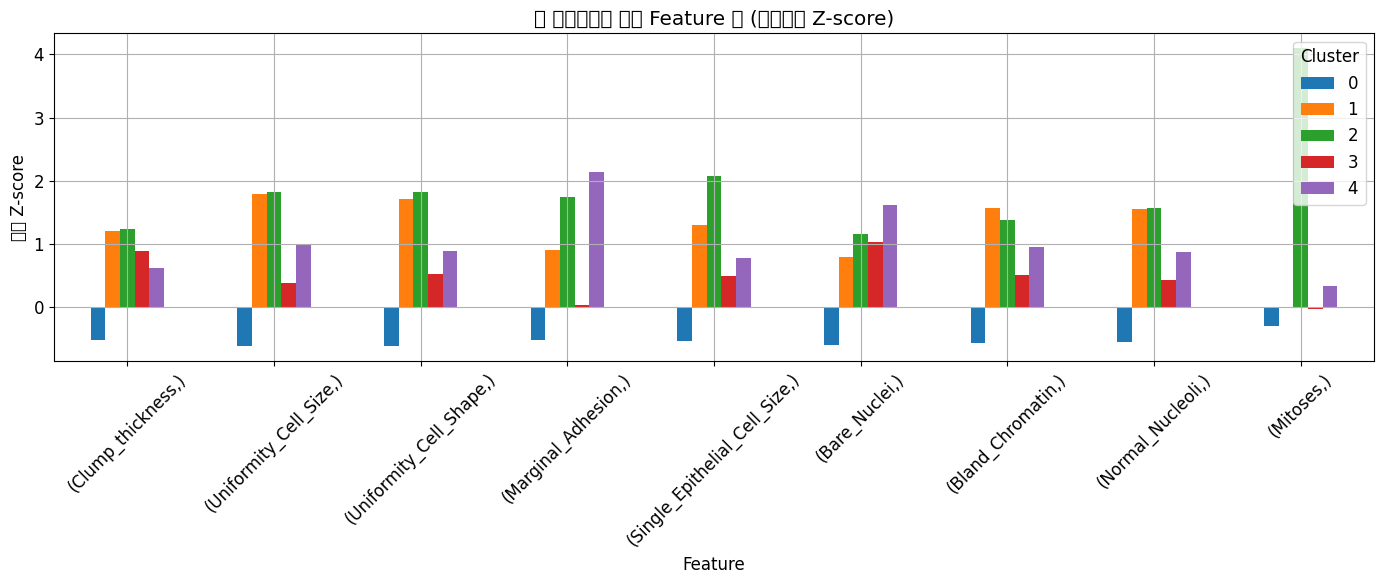

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# 클러스터 중심 좌표를 DataFrame으로 변환
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=X_train.columns)

# 전치하여 feature가 X축에 오도록 함
centroids_df.T.plot(kind='bar', figsize=(14, 6))

plt.title("📊 클러스터별 평균 Feature 값 (정규화된 Z-score)")
plt.ylabel("평균 Z-score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend(title="Cluster", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


PCA 1 성분 기여율: 0.6556
PCA 2 성분 기여율: 0.0865
PCA 3 성분 기여율: 0.0596
PCA 4 성분 기여율: 0.0522
PCA 5 성분 기여율: 0.0401


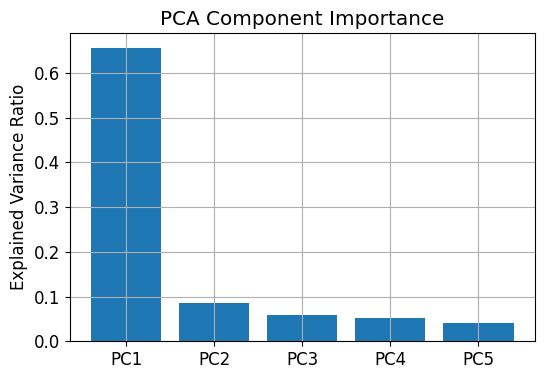

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 모델 훈련 (5차원으로 축소)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)

# 중요도 출력
explained_var = pca.explained_variance_ratio_
for i, var in enumerate(explained_var, 1):
    print(f'PCA {i} 성분 기여율: {var:.4f}')

# 기여율 시각화
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), explained_var, tick_label=[f'PC{i}' for i in range(1, 6)])
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Component Importance")
plt.grid(True)
plt.show()


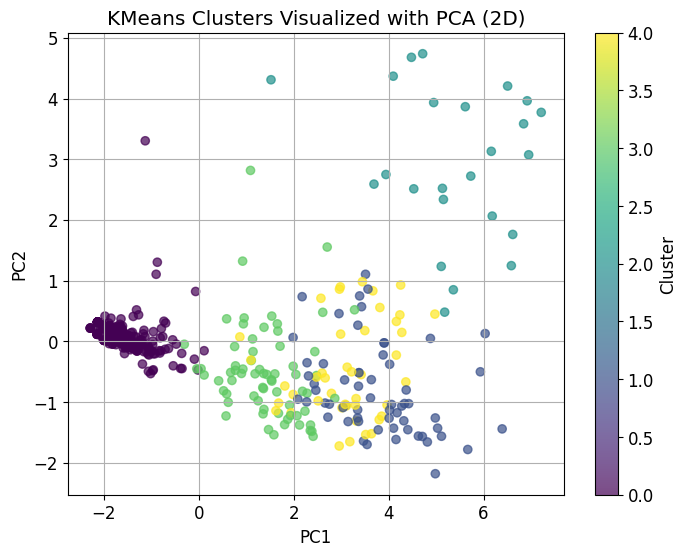

In [58]:
# PCA 2차원으로 다시 변환 (시각화용)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)

# 기존 클러스터 예측 (n_clusters=5 기준)
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_train)

# 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters Visualized with PCA (2D)")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
